In [1]:
from emolib import EmoScores

PROJECT_ROOT:  /home/finley/Programming/github_forks/emolib


In [2]:
emos = EmoScores()

In [3]:
sample_text = """
The sun was shining on the sea,
Shining with all his might:
He did his very best to make
The billows smooth and bright -
And this was odd, because it was
The middle of the night.

The moon was shining sulkily,
Because she thought the sun
Had got no business to be there
After the day was done -
"It's very rude of him," she said,
"To come and spoil the fun."

The sea was wet as wet could be,
The sands were dry as dry.
You could not see a cloud, because
No cloud was in the sky:
No birds were flying overhead -
There were no birds to fly.
The Walrus and the Carpenter
Were walking close at hand;
They wept like anything to see
Such quantities of sand:
"If this were only cleared away,"
They said, "it would be grand."

"If seven maids with seven mops
Swept it for half a year,
Do you suppose", the Walrus said,
"That they could get it clear?"
"I doubt it," said the Carpenter,
And shed a bitter tear.

"O Oysters, come and walk with us!"
The Walrus did beseech.
"A pleasant walk, a pleasant talk,
Along the briny beach:
We cannot do with more than four,
To give a hand to each."

The eldest Oyster looked at him,
But never a word he said:
The eldest Oyster winked his eye,
And shook his heavy head -
Meaning to say he did not choose
To leave the oyster-bed.

But four young Oysters hurried up,
All eager for the treat:
Their coats were brushed, their faces washed,
Their shoes were clean and neat -
And this was odd, because, you know,
They hadn't any feet.

Four other Oysters followed them,
And yet another four;
And thick and fast they came at last,
And more, and more, and more -
All hopping through the frothy waves,
And scrambling to the shore.

The Walrus and the Carpenter
Walked on a mile or so,
And then they rested on a rock
Conveniently low:
And all the little Oysters stood
And waited in a row.

"The time has come", the Walrus said,
"To talk of many things:
Of shoes -and ships -and sealing wax -
Of cabbages -and kings -
And why the sea is boiling hot -
And whether pigs have wings."

"But wait a bit," the Oysters cried,
"Before we have our chat;
For some of us are out of breath,
And all of us are fat!"
"No hurry!" said the Carpenter.
They thanked him much for that.

"A loaf of bread", the Walrus said,
"Is what we chiefly need:
Pepper and vinegar, besides,
Are very good indeed -
Now, if you're ready, Oysters dear,
We can begin to feed."

"But not on us!" the Oysters cried,
Turning a little blue.
"After such kindness, that would be
A dismal thing to do!"
"The night is fine," the Walrus said,
"Do you admire the view?

"It was so kind of you to come!
And you are very nice!"
The Carpenter said nothing but
"Cut us another slice.
I wish you were not quite so deaf -
I've had to ask you twice!"

"It seems a shame", the Walrus said,
"To play them such a trick.
After we've brought them out so far,
And made them trot so quick!"
The Carpenter said nothing but
"The butter's spread too thick!"

"I weep for you," the Walrus said:
"I deeply sympathize."
With sobs and tears he sorted out
Those of the largest size,
Holding his pocket-handkerchief
Before his streaming eyes.

"O Oysters," said the Carpenter,
"You've had a pleasant run!
Shall we be trotting home again?"
But answer came there none -
And this was scarcely odd, because
They'd eaten every one.
"""

In [4]:
fmnt = emos.formamentis_network(sample_text)

BEFORE: [('come', 'scramble'), ('treat', 'hurry'), ('thick', 'follow'), ('you', 'view'), ('word', 'he'), ('walk', 'mile'), ('word', 'look'), ('low', 'stand'), ('pocket', 'handkerchief'), ('billow', 'bright'), ('rest', 'low'), ('hop', 'scramble'), ('odd', 'answer'), ('good', 'begin'), ('admire', 'fine'), ('fun', 'play'), ('brush', 'face'), ('need', 'loaf'), ('eat', 'scarcely'), ('little', 'wait'), ('admire', 'night'), ('twice', 'wish'), ('wink', 'eye'), ('thing', 'say'), ('nothing', 'slice'), ('they', 'oyster'), ('view', 'walrus'), ('she', 'spoil'), ('sea', 'shine'), ('weep', 'away'), ('begin', 'say'), ('ask', 'need'), ('he', 'eye'), ('good', 'dear'), ('eld', 'look'), ('trot', 'they'), ('get', 'come'), ('good', 'smooth'), ('nothing', 'cut'), ('we', 'bring'), ('bit', 'oyster'), ('it', 'you'), ('walk', 'pleasant'), ('loaf', 'begin'), ('kindness', 'thing'), ('handkerchief', 'he'), ('sulkily', 'she'), ('come', 'hop'), ('they', 'foot'), ('chat', 'cry'), ('sympathize', 'say'), ('his', 'sort')

In [96]:
def _wordnet_synonims(vertexlist, edgelist, language, with_type = False):
    """
    1. For each word `i` in vertexlist, get all synonims `S_i`
    2. For each pair of word in vertexlist that are synonims, draw an edge
       like (i, j \in S_i)
    """
    lang = _language_code3(language)
    if not lang:
        return edgelist

#    L = len(edgelist)
    synonims_list = [list(set(itertools.chain(*[w.lemma_names(lang) for w in wn.synsets(x, lang = lang)]))) for x in vertexlist]
    synonims_pairs = [list(itertools.combinations(syn, 2)) for syn in synonims_list if len(syn) > 0]

    synonims_pairs = [[(a, b) for (a, b) in w if a in vertexlist and b in vertexlist] for w in synonims_pairs]
    synonims_pairs = list(set(itertools.chain(*synonims_pairs)))

    if with_type:
        synonims_pairs = [(a, b, 'semantic') for a, b in synonims_pairs]
    edgelist += synonims_pairs

    return edgelist 


In [110]:
test_text = "The man likes dogs. The woman appreciates hounds."
fmnt = emos.formamentis_network(test_text)

BEFORE: [('appreciate', 'hound'), ('woman', 'hound'), ('like', 'dog'), ('man', 'like'), ('hound', 'dog'), ('man', 'dog'), ('woman', 'appreciate')]

AFTER: [('appreciate', 'hound'), ('woman', 'hound'), ('like', 'dog'), ('man', 'like'), ('hound', 'dog'), ('man', 'dog'), ('woman', 'appreciate'), ('hound', 'dog')]


In [111]:
before = fmnt.edges.copy()

In [113]:
before

[('appreciate', 'hound'),
 ('woman', 'hound'),
 ('like', 'dog'),
 ('man', 'like'),
 ('hound', 'dog'),
 ('man', 'dog'),
 ('woman', 'appreciate'),
 ('hound', 'dog')]

In [114]:
from language_dependencies import _negations, _pronouns, _language_code3, _valences
from nltk.corpus import wordnet as wn
import itertools
after = _wordnet_synonims(fmnt.vertices, fmnt.edges, "english", with_type = False)
assert all([a == b for b, a in zip(before, after)])

In [115]:
after

[('appreciate', 'hound'),
 ('woman', 'hound'),
 ('like', 'dog'),
 ('man', 'like'),
 ('hound', 'dog'),
 ('man', 'dog'),
 ('woman', 'appreciate'),
 ('hound', 'dog'),
 ('hound', 'dog')]

In [102]:
fmnt.edges

[('man', 'hound'),
 ('appreciate', 'hound'),
 ('like', 'dog'),
 ('man', 'like'),
 ('hound', 'dog'),
 ('man', 'appreciate'),
 ('man', 'dog'),
 ('hound', 'dog'),
 ('hound', 'dog')]

In [103]:
after

[('man', 'hound'),
 ('appreciate', 'hound'),
 ('like', 'dog'),
 ('man', 'like'),
 ('hound', 'dog'),
 ('man', 'appreciate'),
 ('man', 'dog'),
 ('hound', 'dog'),
 ('hound', 'dog')]

ALPHAS:  <class 'float'> 9 [0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.3, 0.3, 0.5]
[<class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>]
lw:  <class 'int'> 9 [1, 1, 1, 1, 1, 3, 1, 1, 1]


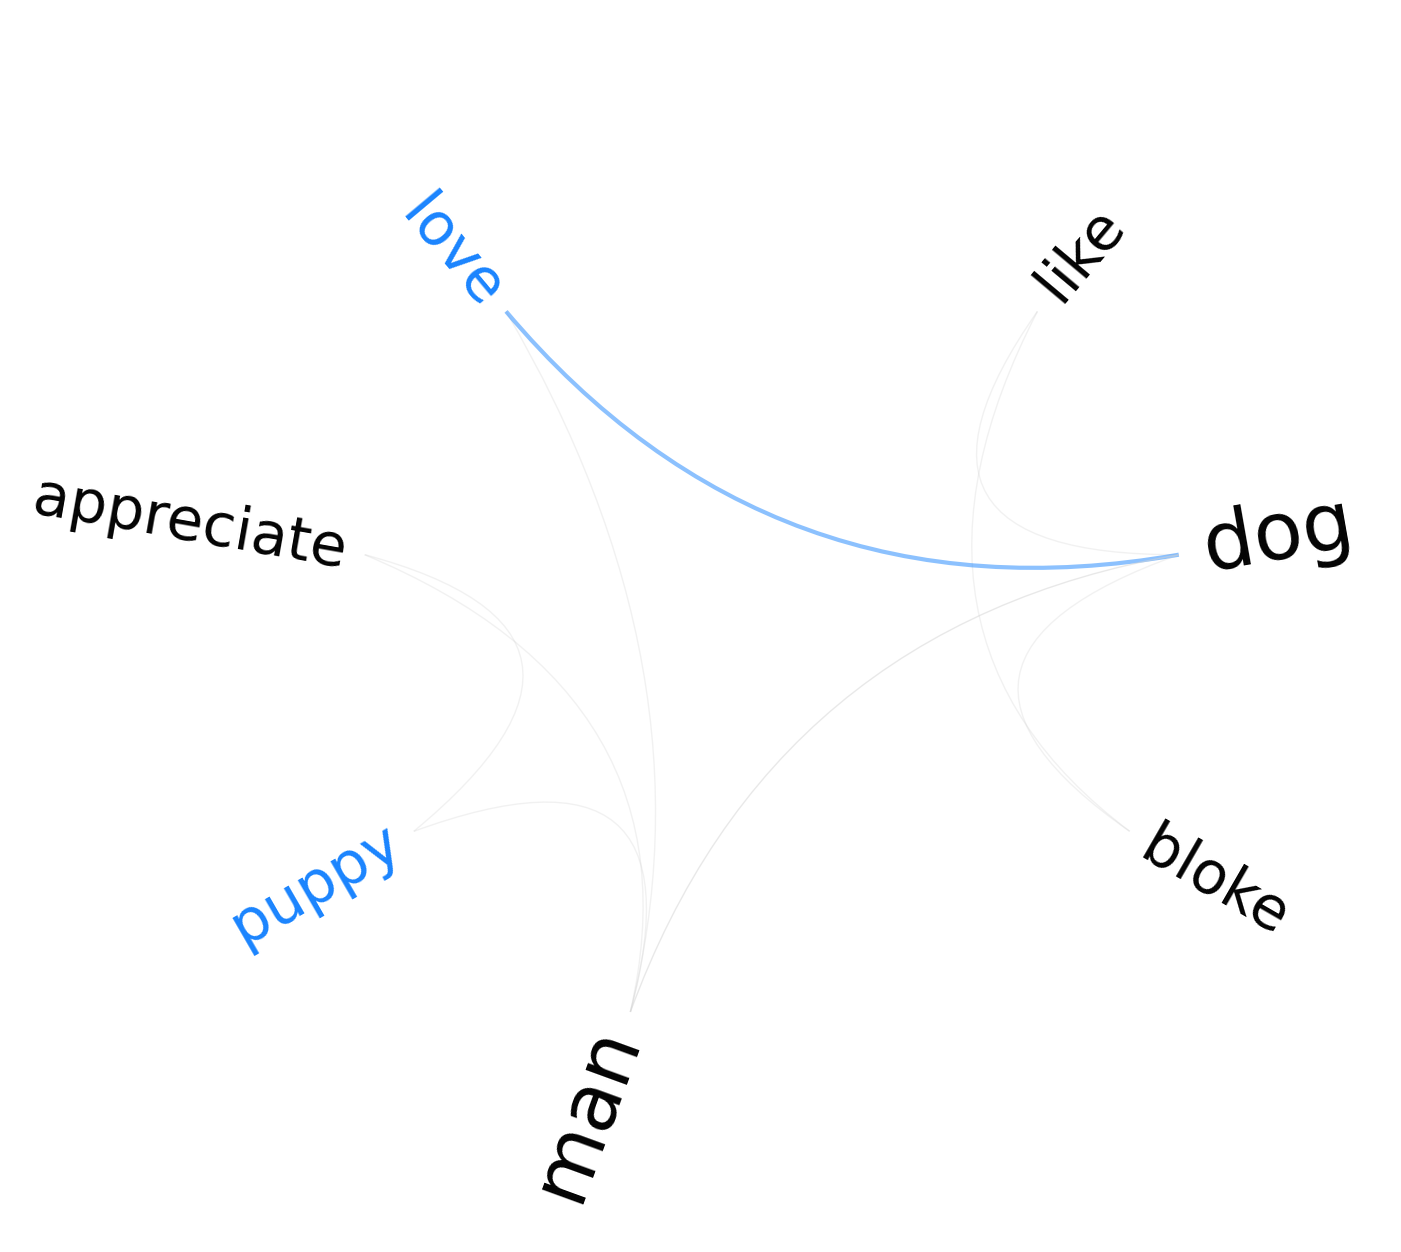

In [40]:
emos.draw_formamentis(fmnt);

This is a large and complex network. Perhaps we do not want to conside the whole network:

In [6]:
fmnt_walrus = emos.formamentis_network(samlpe_text, target_word="walrus")
emos.draw_formamentis(fmnt_walrus);

NameError: name 'samlpe_text' is not defined

In [ ]:
fmnt_carpenter = emos.formamentis_network(samlpe_text, target_word="carpenter")
emos.draw_formamentis(fmnt_carpenter);

In [ ]:
for vertex in set(fmnt_carpenter.vertices):
    v_edges = [edge for edge in fmnt_carpenter.edges if vertex in edge]
    assert any(["carpenter" in edge for edge in v_edges])

In [ ]:
v_edges